In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving steam.csv to steam.csv


In [ ]:
steam_clean = pd.read_csv('steam.csv')
steam_clean.head()

appid                       name release_date  english         developer  \
0     10             Counter-Strike   2000-11-01        1             Valve   
1     20      Team Fortress Classic   1999-04-01        1             Valve   
2     30              Day of Defeat   2003-05-01        1             Valve   
3     40         Deathmatch Classic   2001-06-01        1             Valve   
4     50  Half-Life: Opposing Force   1999-11-01        1  Gearbox Software   

  publisher          platforms  required_age  \
0     Valve  windows;mac;linux             0   
1     Valve  windows;mac;linux             0   
2     Valve  windows;mac;linux             0   
3     Valve  windows;mac;linux             0   
4     Valve  windows;mac;linux             0   

                                          categories  genres  \
0  Multi-player;Online Multi-Player;Local Multi-P...  Action   
1  Multi-player;Online Multi-Player;Local Multi-P...  Action   
2              Multi-player;Valve Anti-Cheat enabled  Action   
3  Multi-player;Online Multi-Player;Local Multi-P...  Action   
4  Single-player;Multi-player;Valve Anti-Cheat en...  Action   

                  steamspy_tags  achievements  positive_ratings  \
0        Action;FPS;Multiplayer             0            124534   
1        Action;FPS;Multiplayer             0              3318   
2  FPS;World War II;Multiplayer             0              3416   
3        Action;FPS;Multiplayer             0              1273   
4             FPS;Action;Sci-fi             0              5250   

   negative_ratings  average_playtime  median_playtime             owners  \
0              3339             17612              317  10000000-20000000   
1               633               277               62   5000000-10000000   
2               398               187               34   5000000-10000000   
3               267               258              184   5000000-10000000   
4               288               624              415   5000000-10000000   

   price  
0   7.19  
1   3.99  
2   3.99  
3   3.99  
4   3.99

In [ ]:
steam_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27075 non-null  int64  
 1   name              27075 non-null  object 
 2   release_date      27075 non-null  object 
 3   english           27075 non-null  int64  
 4   developer         27074 non-null  object 
 5   publisher         27061 non-null  object 
 6   platforms         27075 non-null  object 
 7   required_age      27075 non-null  int64  
 8   categories        27075 non-null  object 
 9   genres            27075 non-null  object 
 10  steamspy_tags     27075 non-null  object 
 11  achievements      27075 non-null  int64  
 12  positive_ratings  27075 non-null  int64  
 13  negative_ratings  27075 non-null  int64  
 14  average_playtime  27075 non-null  int64  
 15  median_playtime   27075 non-null  int64  
 16  owners            27075 non-null  object

# EDA singkat

A. Statistik Deskriptif

In [ ]:
steam_clean.describe()

appid       english  required_age  achievements  \
count  2.707500e+04  27075.000000  27075.000000  27075.000000   
mean   5.962035e+05      0.981127      0.354903     45.248864   
std    2.508942e+05      0.136081      2.406044    352.670281   
min    1.000000e+01      0.000000      0.000000      0.000000   
25%    4.012300e+05      1.000000      0.000000      0.000000   
50%    5.990700e+05      1.000000      0.000000      7.000000   
75%    7.987600e+05      1.000000      0.000000     23.000000   
max    1.069460e+06      1.000000     18.000000   9821.000000   

       positive_ratings  negative_ratings  average_playtime  median_playtime  \
count      2.707500e+04      27075.000000      27075.000000      27075.00000   
mean       1.000559e+03        211.027147        149.804949        146.05603   
std        1.898872e+04       4284.938531       1827.038141       2353.88008   
min        0.000000e+00          0.000000          0.000000          0.00000   
25%        6.000000e+00          2.000000          0.000000          0.00000   
50%        2.400000e+01          9.000000          0.000000          0.00000   
75%        1.260000e+02         42.000000          0.000000          0.00000   
max        2.644404e+06     487076.000000     190625.000000     190625.00000   

              price  
count  27075.000000  
mean       6.078193  
std        7.874922  
min        0.000000  
25%        1.690000  
50%        3.990000  
75%        7.190000  
max      421.990000

Interpretasi:

- Dataset berisi sekitar 27.000 game.
- Hampir semua game berbahasa Inggris (98%).
- Mayoritas tidak memiliki batasan umur dan tidak memiliki fitur achievements.
- Sebagian besar game memiliki sedikit ulasan positif — median hanya 7 ulasan, tapi ada beberapa dengan jumlah sangat tinggi (hingga 2,6 juta), menunjukkan distribusi yang sangat miring (right-skewed).
- Ulasan negatif jauh lebih sedikit dibanding positif.
- Rata-rata waktu bermain sekitar 150 jam, tapi median hanya 9 jam, menandakan perbedaan ekstrem antar game (adanya outlier).
- Harga game bervariasi dari gratis (0) hingga sekitar £421, dengan rata-rata £6 — artinya sebagian besar game berharga murah hingga menengah.

B. Distribusi awal data menggunakan grafik sederhana

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Atur style biar rapi
sns.set(style="whitegrid")

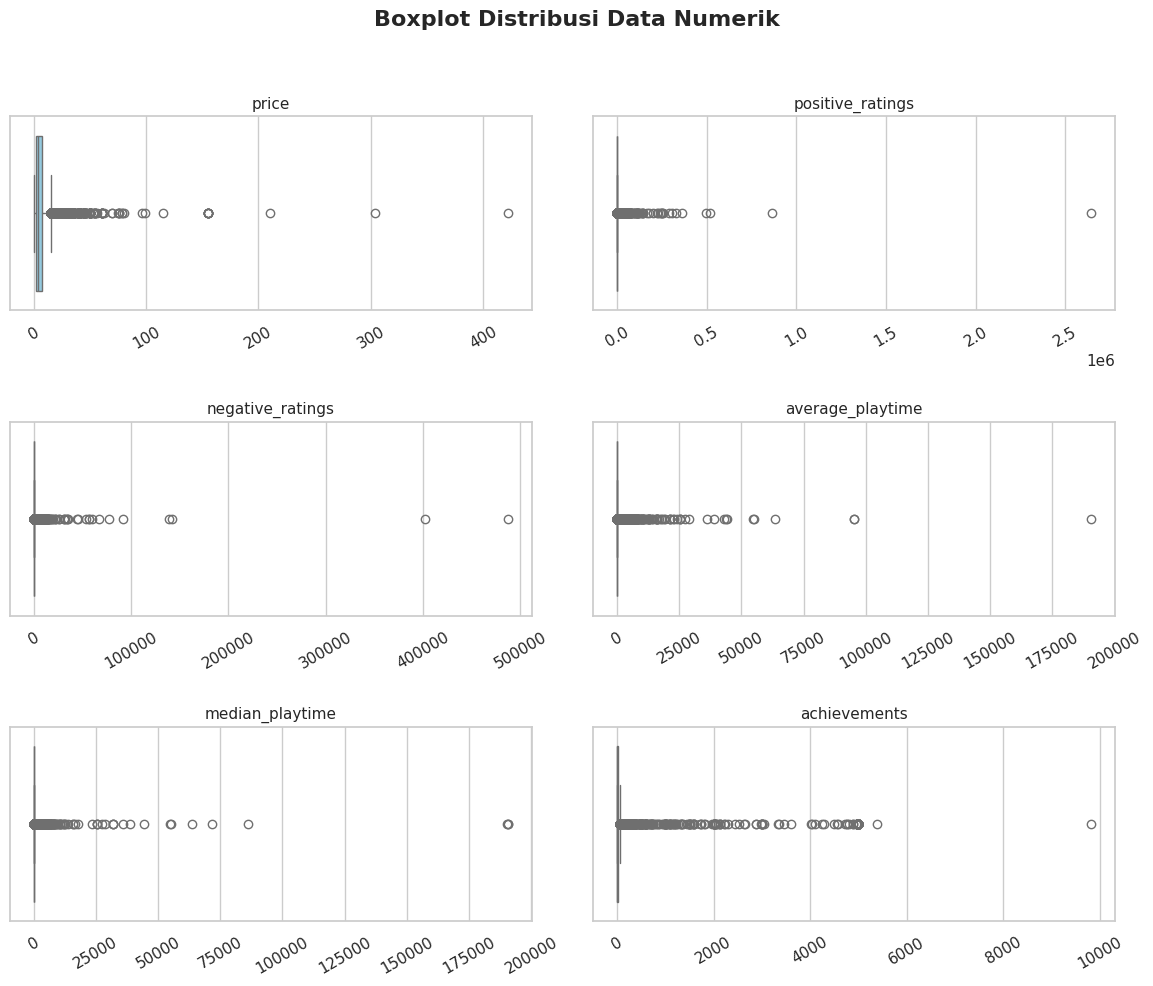

In [ ]:
#Bloxplot untuk Deteksi Outlier
num_cols = ['price', 'positive_ratings', 'negative_ratings',
            'average_playtime', 'median_playtime', 'achievements']

plt.figure(figsize=(12, 10))

# Loop untuk setiap kolom
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=steam_clean[col], color='skyblue')
    plt.title(col, fontsize=11)
    plt.xlabel("")
    plt.xticks(rotation=30)

# Tambah judul utama
plt.suptitle("Boxplot Distribusi Data Numerik", fontsize=16, fontweight='bold', y=1)

plt.tight_layout(pad=2)
plt.show()

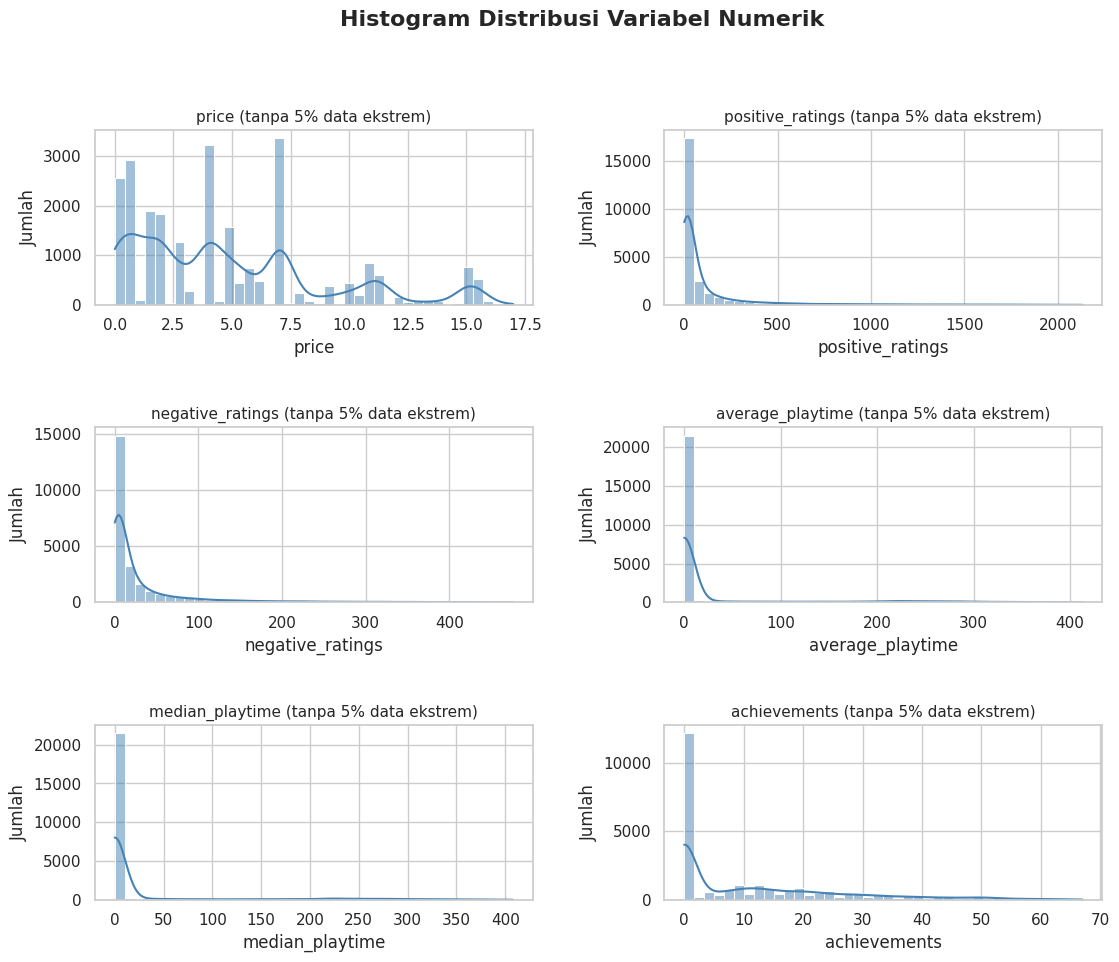

In [ ]:
#Histogram Distribusi Variabel Numerik
num_cols = ['price', 'positive_ratings', 'negative_ratings',
            'average_playtime', 'median_playtime', 'achievements']

plt.figure(figsize=(13, 10))  # sedikit diperlebar

for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 2, i)
    q95 = steam_clean[col].quantile(0.95)  # batas atas (hapus outlier ekstrem)
    sns.histplot(steam_clean[steam_clean[col] <= q95][col],
                 bins=40, kde=True, color='steelblue')
    plt.title(f"{col} (tanpa 5% data ekstrem)", fontsize=11)
    plt.xlabel(col)
    plt.ylabel("Jumlah")

# atur jarak antar subplot
plt.subplots_adjust(hspace=0.7, wspace=0.3)  # jarak vertikal & horizontal
plt.suptitle("Histogram Distribusi Variabel Numerik", fontsize=16, fontweight='bold', y=1)
plt.show()

Interpretasi Gabungan Boxplot dan Histogram

Berdasarkan hasil boxplot distribusi data numerik, terlihat bahwa hampir seluruh variabel seperti price, positive_ratings, negative_ratings, average_playtime, median_playtime, dan achievements memiliki banyak outlier dan distribusi yang condong ke kanan (right-skewed). Hal ini menunjukkan adanya ketimpangan yang cukup besar dalam dataset — di mana sebagian kecil game memiliki nilai yang jauh lebih tinggi dibandingkan mayoritas lainnya. Misalnya, hanya beberapa game yang berharga mahal, memiliki ulasan sangat banyak, atau dimainkan dalam waktu yang sangat lama.

Untuk mendapatkan gambaran distribusi yang lebih representatif terhadap mayoritas data, dilakukan penghapusan 5% data ekstrem (outlier) sebelum menampilkan histogram. Setelah pembersihan tersebut, hasil histogram distribusi variabel numerik menunjukkan bahwa seluruh variabel tetap memiliki bentuk distribusi yang condong ke kanan, namun pola utamanya menjadi lebih jelas dan terukur. Mayoritas game tampak memiliki harga relatif rendah (<£10), jumlah ulasan dan waktu bermain yang sedikit, serta jumlah pencapaian yang rendah atau bahkan tidak ada.

Secara keseluruhan, kombinasi antara boxplot dan histogram memberikan pemahaman yang lebih komprehensif. Boxplot membantu mengidentifikasi adanya outlier dalam data, sedangkan histogram (setelah penghapusan data ekstrem) membantu memperlihatkan pola distribusi umum tanpa pengaruh nilai-nilai ekstrem. Dengan demikian, analisis ini menunjukkan bahwa struktur data game di Steam sangat tidak merata, di mana hanya sebagian kecil game yang mendominasi popularitas dan aktivitas pemain.

# Visualisasi

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from ipywidgets import interact

1. Bagaimana tren perilisan game berdasarkan tahun rilis, dan apakah terdapat peningkatan signifikan pada periode tertentu?

In [ ]:
steam_clean['release_date'] = pd.to_datetime(steam_clean['release_date'], errors='coerce')
steam_clean['release_year'] = steam_clean['release_date'].dt.year

# Hitung jumlah game per tahun
games_per_year = steam_clean.groupby('release_year').size().reset_index(name='count')
games_per_year = games_per_year[(games_per_year['release_year'] >= 1990) &
                                (games_per_year['release_year'] <= 2025)]

# Plot interaktif
fig = px.line(
    games_per_year,
    x='release_year',
    y='count',
    markers=True,
    title='Tren Perilisan Game Berdasarkan Tahun Rilis',
    labels={'release_year': 'Tahun Rilis', 'count': 'Jumlah Game'},
    line_shape='spline'
)

fig.update_traces(line_color='royalblue', line_width=3)
fig.update_layout(
    template='plotly_white',
    title_x=0.5,
    title_font=dict(size=20, family='Arial', color='black'),
    xaxis=dict(tickmode='linear', tick0=1990, dtick=2),
    yaxis_title='Jumlah Game Dirilis',
    hovermode='x unified'
)

fig.show()

Interpretasi:

1. Periode 1996–2012:
Jumlah game yang dirilis setiap tahun relatif stabil dan rendah, hanya mengalami sedikit kenaikan dari waktu ke waktu. Ini menunjukkan bahwa industri game masih dalam tahap berkembang, dengan jumlah pengembang dan platform distribusi yang terbatas.

2. Periode 2013–2018:
Terjadi peningkatan signifikan dan sangat tajam dalam jumlah game yang dirilis. Kenaikan mulai terlihat sekitar tahun 2013 dan mencapai puncak sekitar tahun 2018, di mana jumlah game yang dirilis mencapai lebih dari 8.000 judul.

Faktor yang mungkin memengaruhi lonjakan ini:
- Meningkatnya popularitas platform distribusi digital seperti Steam.
- Kemudahan akses bagi pengembang independen (indie developers) untuk merilis game tanpa penerbit besar.
- Perkembangan teknologi engine game seperti Unity dan Unreal Engine, yang mempermudah pembuatan game.

3. Periode setelah 2018 (2019):
Terlihat adanya penurunan tajam dalam jumlah game yang dirilis. Ini bisa disebabkan oleh:
- Data tahun 2019 yang belum lengkap (misalnya pengumpulan data dilakukan sebelum akhir tahun).
- Atau adanya saturasi pasar, di mana jumlah game yang beredar sudah sangat banyak.

Kesimpulan:

Terdapat peningkatan yang sangat signifikan dalam jumlah game yang dirilis mulai dari tahun 2013 hingga mencapai puncak pada tahun 2018. Hal ini mencerminkan pertumbuhan besar industri game digital dan peran penting platform distribusi online dalam mempercepat laju perilisan game.

2. Bagaimana persebaran gim berdasarkan genre yang terdapat pada platform Steam, dan genre apa yang paling dominan?

In [ ]:
steam_clean['genres'] = steam_clean['genres'].fillna('Unknown')
genre_explode = steam_clean.assign(genres=steam_clean['genres'].str.split(';')).explode('genres')

# Data per rentang waktu
current_year = genre_explode['release_year'].max()
ranges = {
    'Semua': genre_explode,
    '5 Tahun Terakhir': genre_explode[genre_explode['release_year'] >= current_year - 5],
    '10 Tahun Terakhir': genre_explode[genre_explode['release_year'] >= current_year - 10],
    '20 Tahun Terakhir': genre_explode[genre_explode['release_year'] >= current_year - 20]
}

# Hitung jumlah game per genre
genre_data = {}
for label, df in ranges.items():
    counts = df['genres'].value_counts().reset_index()
    counts.columns = ['Genre', 'Jumlah_Game']
    genre_data[label] = counts

# Plot awal
fig = px.bar(
    genre_data['Semua'].sort_values('Jumlah_Game', ascending=False).head(20),
    x='Genre',
    y='Jumlah_Game',
    color='Jumlah_Game',
    color_continuous_scale=[[0, '#A7C7E7'], [1, '#003366']],
    title='Persebaran Game Berdasarkan Genre di Steam (Semua)'
)

# Dropdown filter
buttons = []
for label, df in genre_data.items():
    df_sorted = df.sort_values('Jumlah_Game', ascending=False).head(20)
    buttons.append(dict(
        label=label,
        method='update',
        args=[{
            'x': [df_sorted['Genre']],
            'y': [df_sorted['Jumlah_Game']],
            'text': [None],
            'marker': {'color': df_sorted['Jumlah_Game'], 'colorscale': [[0, '#A7C7E7'], [1, '#003366']]}
        },
        {'title': f'Persebaran Game Berdasarkan Genre di Steam ({label})'}]
    ))

fig.update_layout(
    updatemenus=[{
        'buttons': buttons,
        'direction': 'down',
        'showactive': True,
        'x': 1.15,
        'xanchor': 'left',
        'y': 1,
        'yanchor': 'top'
    }],
    margin=dict(r=200),
    xaxis_title="Genre",
    yaxis_title="Jumlah Game",
    title_x=0.5,
    plot_bgcolor='white',
    paper_bgcolor='white',
    hovermode='x unified',
    coloraxis_showscale=False
)

fig.update_traces(textposition='outside', marker_line_color='black', marker_line_width=0.5, opacity=0.9)
fig.update_xaxes(tickangle=-45)

fig.show()

Interpretasi Visualisasi 2:

*   Genre “Indie” mendominasi dengan lebih dari 19.000 judul game, jauh melampaui genre lain seperti Action, Casual, dan Adventure (sekitar 10.000–12.000 judul).
*   Dominasi Indie menunjukkan bahwa industri game independen berkembang pesat di Steam karena kemudahan publikasi tanpa penerbit besar.
*   Biaya distribusi yang rendah dan aksesibilitas tinggi bagi pengembang kecil turut mempercepat pertumbuhan genre ini.
*   Genre populer lain seperti Strategy, Simulation, dan RPG juga memiliki jumlah game yang cukup banyak, menandakan keragaman preferensi pengembang dan pemain.
*   Genre seperti Education, Animation & Modeling, dan Design & Illustration berada di posisi terbawah, menunjukkan minimnya pengembangan game non-hiburan atau edukatif.

🎯 Kesimpulan:

Distribusi genre di Steam memperlihatkan dominasi game hiburan seperti Indie dan Action, sedangkan genre edukatif dan profesional masih minim, menegaskan fokus Steam sebagai platform utama bagi pengembang indie dan game rekreasional.

3. Bagaimana hubungan antara harga gim dengan tingkat ulasan atau rekomendasi positif dari pengguna?

In [ ]:
# --- Salin dataset dasar ---
steam_filtered = steam_clean.copy()

# --- Tambahkan kolom rasio ulasan positif ---
steam_filtered['positive_ratio'] = steam_filtered['positive_ratings'] / (
    steam_filtered['positive_ratings'] + steam_filtered['negative_ratings']
)

# --- Tambahkan kolom genre utama (ambil genre pertama saja) ---
steam_filtered['genres_list'] = steam_filtered['genres'].str.split(';').str[0]

# --- Filter harga maksimal 100 ---
steam_filtered = steam_filtered[steam_filtered['price'] <= 100]

# --- Scatter plot utama ---
fig = px.scatter(
    steam_filtered,
    x='positive_ratio',
    y='price',
    color='price',
    color_continuous_scale=[
        [0.00, "#1f77b4"],  # Biru untuk gratis (0)
        [0.05, "#63b3de"],  # Biru muda untuk murah
        [0.10, "#fee08b"],  # Kuning muda (harga menengah)
        [0.30, "#f46d43"],  # Oranye
        [1.00, "#d73027"]   # Merah untuk paling mahal
    ],
    range_color=[0, 50],  # fokus gradasi di harga 0-50
    hover_data=['name', 'developer', 'publisher', 'genres_list'],
    title='Hubungan antara Persentase Ulasan Positif dan Harga Game (Steam)',
    labels={
        'positive_ratio': 'Persentase Ulasan Positif',
        'price': 'Harga Game (£)',
        'genres_list': 'Genre'
    },
    width=1250,
    height=600
)

# --- Buat dropdown untuk tiap genre ---
genres_unique = steam_filtered['genres_list'].dropna().unique().tolist()

dropdown_buttons = [
    {
        'label': genre,
        'method': 'update',
        'args': [
            {
                'x': [steam_filtered[steam_filtered['genres_list'] == genre]['positive_ratio']],
                'y': [steam_filtered[steam_filtered['genres_list'] == genre]['price']],
                'marker.color': [steam_filtered[steam_filtered['genres_list'] == genre]['price']]
            },
            {'title': f'Hubungan antara Persentase Ulasan Positif dan Harga untuk Genre: {genre}'}
        ]
    }
    for genre in genres_unique
]

# --- Tambahkan opsi "Tampilkan Semua" ---
dropdown_buttons.insert(0, {
    'label': 'Tampilkan Semua',
    'method': 'update',
    'args': [
        {
            'x': [steam_filtered['positive_ratio']],
            'y': [steam_filtered['price']],
            'marker.color': [steam_filtered['price']]
        },
        {'title': 'Hubungan antara Persentase Ulasan Positif dan Harga Game (Steam)'}
    ]
})

# --- Layout dropdown dan gaya ---
fig.update_layout(
    updatemenus=[{
        'buttons': dropdown_buttons,
        'direction': 'down',
        'showactive': True,
        'x': 1.08,
        'xanchor': 'left',
        'y': 1.02,
        'yanchor': 'top'
    }],
    title_x=0.5,
    plot_bgcolor='white',
    xaxis=dict(showgrid=True, gridcolor='lightgray', tickformat=".0%"),
    yaxis=dict(showgrid=True, gridcolor='lightgray'),
    margin=dict(l=80, r=150, t=100, b=80),
    coloraxis_colorbar=dict(title='Harga (£)')
)

# --- Hover style ---
fig.update_traces(
    marker=dict(size=8, opacity=0.75, line=dict(width=0.4, color='DarkSlateGrey')),
    hovertemplate=(
        'Persentase Ulasan Positif=%{x:.0%}<br>'
        'Harga Game (£)=%{y}<br>'
        'Nama=%{customdata[0]}<br>'
        'Developer=%{customdata[1]}<br>'
        'Publisher=%{customdata[2]}<br>'
        'Genre=%{customdata[3]}<extra></extra>'
    )
)

# --- Tampilkan plot ---
fig.show()

Intepretasi Visualisasi 3:

- Sebagian besar gim, baik yang murah maupun yang mahal, memiliki persentase ulasan positif yang tinggi (banyak berada di atas 70%).
- Tidak ada korelasi yang jelas antara harga gim dan tingkat ulasan positif. Gim dengan harga tinggi maupun rendah sama-sama bisa mendapat ulasan positif tinggi.
- Namun, gim dengan harga rendah jauh lebih banyak jumlahnya, dan banyak di antaranya juga mendapat persentase ulasan positif yang baik.

Kesimpulan:

Harga gim tidak berpengaruh signifikan terhadap tingkat kepuasan atau rekomendasi pengguna. Faktor lain seperti kualitas, gameplay, atau reputasi pengembang kemungkinan lebih menentukan tingkat ulasan positif.

4. Apakah terdapat hubungan antara jumlah pemain dengan durasi rata-rata bermain?

In [ ]:
# Isi missing genres dengan 'Unknown'
steam_clean['genres'] = steam_clean['genres'].fillna('Unknown')

# Pecah multi-genre menjadi beberapa baris dan buat copy agar aman
df = steam_clean.assign(genres=steam_clean['genres'].str.split(';')).explode('genres').copy()
df['genres'] = df['genres'].str.strip()

# Hitung owners_mean
df['owners_mean'] = (
    df['owners']
    .str.replace(',', '', regex=False)
    .str.extract(r'(\d+)-(\d+)')
    .astype(float)
    .mean(axis=1)
)

# Bulatkan ke ribuan terdekat
df['owners_mean'] = (df['owners_mean'] / 1000).round() * 1000

# Konversi ke int
df['owners_mean'] = df['owners_mean'].astype(int)

# Buang baris dengan data kosong
df = df.dropna(subset=['owners_mean', 'average_playtime', 'genres'])

# Plot scatter per genre
fig = go.Figure()
genres = sorted(df['genres'].unique())

for g in genres:
    filtered = df[df['genres'] == g]
    fig.add_trace(go.Scatter(
        x=filtered['owners_mean'],
        y=filtered['average_playtime'],
        mode='markers',
        name=g,
        text=filtered['name'],
        hovertemplate=(
            "<b>%{text}</b><br>"
            f"Genre: {g}<br>"
            "Pemain: %{x:,.0f}<br>"
            "Durasi Rata-rata: %{y:,.0f} menit"
        ),
        marker=dict(size=8, opacity=0.7)
    ))

# Dropdown filter genre
buttons = [{'label': 'Semua Genre', 'method': 'update',
            'args': [{'visible': [True]*len(genres)},
                     {'title': 'Semua Genre'}]}]

for i, g in enumerate(genres):
    visible = [False]*len(genres)
    visible[i] = True
    buttons.append({
        'label': g,
        'method': 'update',
        'args': [{'visible': visible},
                 {'title': f"Hubungan antara Jumlah Pemain dan Durasi Rata-Rata Bermain ({g})"}]
    })

fig.update_layout(
    updatemenus=[{
        'buttons': buttons,
        'direction': 'down',
        'x': 1.05,
        'xanchor': 'left',
        'y': 0.5,
        'yanchor': 'middle',
        'showactive': True
    }],
    title={'text': 'Hubungan antara Jumlah Pemain dan Durasi Rata-Rata Bermain',
           'x': 0.5, 'xanchor': 'center'},
    yaxis_title='Durasi Rata-rata Bermain (menit)',
    plot_bgcolor='rgba(245,245,245,1)',
    paper_bgcolor='rgba(245,245,245,1)',
    legend_title_text='Genre',
    xaxis=dict(
        title='Jumlah Pemain',
        tickformat='~s'
    )
)

fig.show()

Interpretasi:

Berdasarkan scatter plot di atas, terlihat bahwa sebagian besar game memiliki jumlah pemain dan durasi rata-rata bermain yang rendah, ditunjukkan oleh banyak titik yang terkonsentrasi di dekat sumbu nol. Hanya sedikit game yang menonjol dengan jumlah pemain atau durasi bermain yang jauh lebih tinggi, tampak sebagai outlier di area kanan atas grafik.

Secara umum, tidak tampak hubungan linear atau pola yang jelas antara jumlah pemain dan durasi rata-rata bermain. Dengan kata lain, game yang populer (memiliki banyak pemain) belum tentu dimainkan dalam waktu lama, dan sebaliknya, game dengan durasi bermain panjang tidak selalu memiliki banyak pemain.

Variasi ini kemungkinan dipengaruhi oleh faktor-faktor seperti genre game, tingkat kesulitan, replayability, serta gaya permainan. Misalnya, game bergenre MMO atau Adventure cenderung memiliki durasi bermain lebih lama, sedangkan game Casual umumnya dimainkan dalam sesi singkat meski populer.

Kesimpulan:

Hubungan antara jumlah pemain dan durasi rata-rata bermain tergolong lemah atau tidak signifikan. Popularitas game tidak selalu berkorelasi dengan lamanya waktu bermain pemain — faktor genre dan desain gameplay berperan lebih besar dalam menentukan durasi bermain.

5. Bagaimana perbandingan tingkat popularitas antar penerbit dan bagaimana hal ini memengaruhi strategi pemasaran?

In [ ]:
steam_clean = steam_clean[steam_clean['publisher'].notna()]

# Group by publisher dan hitung rata-rata positive_ratings
df_agg_all = (
    steam_clean.groupby('publisher', as_index=False)
    .agg({
        'positive_ratings': 'mean',
        'appid': 'count'
    })
    .rename(columns={'appid': 'game_count'})
    .sort_values('positive_ratings', ascending=False)
)

# Kategori untuk rata-rata ratings
def ratings_category(x):
    if x < 1000:
        return '<1k'
    elif 1000 <= x <= 5000:
        return '1k-5k'
    elif x > 5000:
        return '>5k'
    else:
        return 'Semua'

df_agg_all['ratings_category'] = df_agg_all['positive_ratings'].apply(ratings_category)

categories = ['Semua', '<1k', '1k-5k', '>5k']
agg_dict = {}
for cat in categories:
    if cat == 'Semua':
        agg_dict[cat] = df_agg_all.sort_values('positive_ratings', ascending=False).head(20)
    else:
        df_cat = df_agg_all[df_agg_all['ratings_category'] == cat]
        agg_dict[cat] = df_cat.sort_values('positive_ratings', ascending=False).head(20)

# Visualisasi
df = agg_dict['Semua']
fig = px.bar(
    df,
    x='publisher',
    y='positive_ratings',
    labels={'positive_ratings': 'Rata-rata Positive Ratings', 'publisher': 'Publisher'},
    title='Rata-rata Positive Ratings per Publisher (Warna: Jumlah Game)'
)

# Warna batang: gradasi biru wajar (medium)
fig.update_traces(
    marker_color=df['game_count'],
    marker_colorscale=[[0, '#a6cee3'], [0.5, '#1f78b4'], [1, '#08306b']],  # biru lembut ke tua
    marker_line_width=0.8,
    marker_line_color='white',
    opacity=0.95,
    hovertemplate='<b>%{x}</b><br>Rata-rata Positive Ratings: %{y:,.0f}<br>Jumlah Game: %{customdata[0]}<extra></extra>',
    customdata=df[['game_count']].values
)

# Dropdown filter
buttons = []
for cat, df_cat in agg_dict.items():
    buttons.append(dict(
        label=cat,
        method='update',
        args=[
            {
                'x': [df_cat['publisher']],
                'y': [df_cat['positive_ratings']],
                'marker.color': [df_cat['game_count'].values],
                'hovertemplate': ['<b>%{x}</b><br>Rata-rata Positive Ratings: %{y:,.0f}<br>Jumlah Game: %{customdata[0]}<extra></extra>'],
                'customdata': [df_cat[['game_count']].values]
            },
            {'title': f'Rata-rata Positive Ratings per Publisher ({cat})'}
        ]
    ))

# Layout
fig.update_layout(
    updatemenus=[{
        'buttons': buttons,
        'direction': 'down',
        'showactive': True,
        'x': 1.15,
        'xanchor': 'left',
        'y': 1,
        'yanchor': 'top'
    }],
    plot_bgcolor='white',
    paper_bgcolor='white',
    title_x=0.5,
    xaxis=dict(title='', tickangle=45),
    yaxis=dict(showgrid=True, gridcolor='lightgray', title='Rata-rata Positive Ratings'),
    coloraxis=dict(
        colorscale=[[0, '#a6cee3'], [0.5, '#1f78b4'], [1, '#08306b']],
        colorbar=dict(
            title="Jumlah Game",
            thickness=15,
            len=0.8
        ),
        showscale=True
    )
)

# Anotasi warna
fig.add_annotation(
    x=1.12,
    y=0.1,
    xref='paper',
    yref='paper',
    text="<span style='color:#a6cee3'>Sedikit Game</span><br><span style='color:#08306b'>Banyak Game</span>",
    showarrow=False,
    bordercolor="black",
    borderwidth=1,
    borderpad=4,
    bgcolor="white",
    opacity=0.8
)

fig.show()

Berdasarkan grafik, terlihat bahwa beberapa penerbit seperti PUBG Corporation, Smartly Dressed Games, dan Psyonix Inc. memiliki rata-rata ulasan positif tertinggi, menandakan game mereka sangat populer.

Sementara itu, penerbit besar seperti Valve memiliki lebih banyak game (ditunjukkan dengan warna hijau), namun rata-rata ulasan positif per game-nya lebih moderat karena popularitasnya tersebar di banyak judul.

Kesimpulan:

Popularitas antar penerbit tidak merata — beberapa penerbit dengan sedikit game bisa sangat sukses karena satu judul unggulan, sedangkan penerbit besar cenderung memiliki hasil yang lebih seimbang di berbagai game.